In [372]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

https://www.kaggle.com/datasets/atifmasih/students-drugs-addiction-dataset/data

In [373]:
x = pd.read_csv('C:/Users/FRANK/Desktop/Proyectos Linkedin/Python Proyectos/Dia 3/student_addiction_dataset_test.csv')
y = pd.read_csv('C:/Users/FRANK/Desktop/Proyectos Linkedin/Python Proyectos/Dia 3/student_addiction_dataset_train.csv')

df = pd.concat([x,y])
df.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No
1,No,No,Yes,No,No,Yes,No,Yes,No,No,No
2,No,No,No,Yes,No,Yes,No,No,Yes,No,No
3,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes
4,No,No,No,No,Yes,No,No,No,No,Yes,No


In [374]:
df2 = df.copy()
print('Número de observaciones = {}'.format(df2.shape[0]))
print('Total de variables disponibles = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo-')
print(df2.isnull().sum())

Número de observaciones = 63086
Total de variables disponibles = 11 
Columnas que cuentan con un valor nulo-
Experimentation                       3207
Academic_Performance_Decline          3183
Social_Isolation                      3227
Financial_Issues                      3157
Physical_Mental_Health_Problems       3119
Legal_Consequences                    3262
Relationship_Strain                   3175
Risk_Taking_Behavior                  3190
Withdrawal_Symptoms                   3265
Denial_and_Resistance_to_Treatment    3107
Addiction_Class                          0
dtype: int64


In [375]:
df2 = df2.replace({'Yes':1,'No':0})

In [376]:
# Convertir columnas específicas a un tipo numérico, si tiene sentido
numeric_columns = ['Experimentation', 'Academic_Performance_Decline', 'Social_Isolation', 
                   'Financial_Issues', 'Physical_Mental_Health_Problems', 'Legal_Consequences', 
                   'Relationship_Strain', 'Risk_Taking_Behavior', 'Withdrawal_Symptoms', 
                   'Denial_and_Resistance_to_Treatment']

for column in numeric_columns:
    df2[column] = pd.to_numeric(df2[column].round(0), errors='coerce')

# Aplicar la interpolación
df2 = df2.interpolate(method='linear')

# Mostrar el DataFrame resultante

print('Número de observaciones = {}'.format(df2.shape[0]))
print('Total de variables disponibles = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo-')
print(df2.isnull().sum())

Número de observaciones = 63086
Total de variables disponibles = 11 
Columnas que cuentan con un valor nulo-
Experimentation                       0
Academic_Performance_Decline          0
Social_Isolation                      0
Financial_Issues                      0
Physical_Mental_Health_Problems       0
Legal_Consequences                    0
Relationship_Strain                   0
Risk_Taking_Behavior                  0
Withdrawal_Symptoms                   0
Denial_and_Resistance_to_Treatment    0
Addiction_Class                       0
dtype: int64


In [377]:
counts = df2[numeric_columns].apply(pd.Series.value_counts).fillna(0)
total_zeros = counts.loc[0].sum()
total_ones = counts.loc[1].sum()
print(f'Número total de 0 en el dataframe: {total_zeros}')
print(f'Número total de 1 en el dataframe: {total_ones}')

Número total de 0 en el dataframe: 331406.0
Número total de 1 en el dataframe: 283951.0


array([[<Axes: title={'center': 'Experimentation'}>,
        <Axes: title={'center': 'Academic_Performance_Decline'}>,
        <Axes: title={'center': 'Social_Isolation'}>],
       [<Axes: title={'center': 'Financial_Issues'}>,
        <Axes: title={'center': 'Physical_Mental_Health_Problems'}>,
        <Axes: title={'center': 'Legal_Consequences'}>],
       [<Axes: title={'center': 'Relationship_Strain'}>,
        <Axes: title={'center': 'Risk_Taking_Behavior'}>,
        <Axes: title={'center': 'Withdrawal_Symptoms'}>],
       [<Axes: title={'center': 'Denial_and_Resistance_to_Treatment'}>,
        <Axes: title={'center': 'Addiction_Class'}>, <Axes: >]],
      dtype=object)

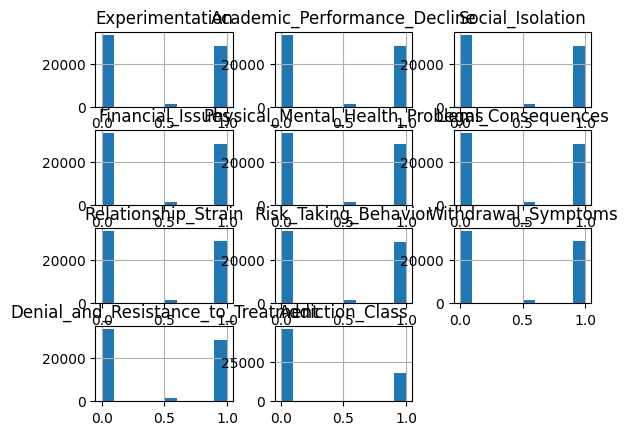

In [378]:
df2.hist()

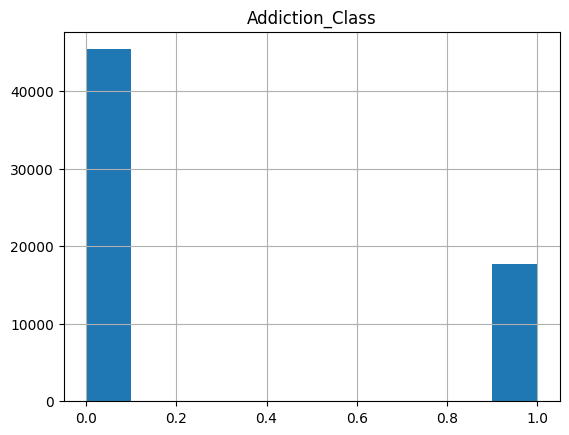

In [379]:
df2.hist('Addiction_Class')
plt.show()

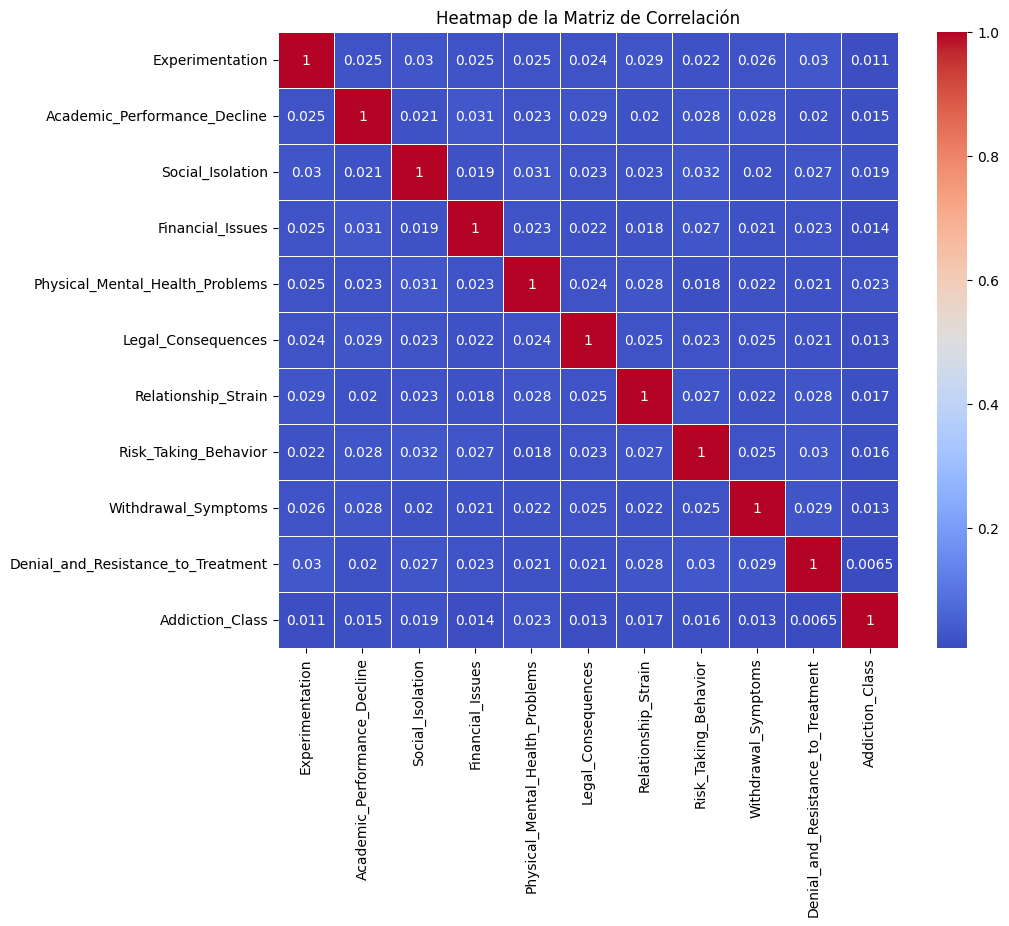

In [380]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de la Matriz de Correlación')
plt.show()

In [381]:
df2.head(20)

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
5,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0
6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
7,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0
8,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0


# Binaria: Dos categorías (Sí/No, Gana/Pierde).
# Multinomial: Más de dos categorías sin orden (colores, marcas)
# Ordinal: Categorías con orden (bajo, medio, alto; clase baja, clase media, clase alta)

In [382]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [383]:
X = df2.drop('Addiction_Class',axis=1)
y = df2['Addiction_Class']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
print('Matriz de Confusión:')
print(confusion_matrix(y_test, y_pred))
print('Reporte de Clasificación:')
print(classification_report(y_test, y_pred))
print('ROC-AUC Score:', roc_auc_score(y_test, y_pred_proba))

Matriz de Confusión:
[[9083    0]
 [3535    0]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84      9083
           1       0.00      0.00      0.00      3535

    accuracy                           0.72     12618
   macro avg       0.36      0.50      0.42     12618
weighted avg       0.52      0.72      0.60     12618

ROC-AUC Score: 0.5260586597185379


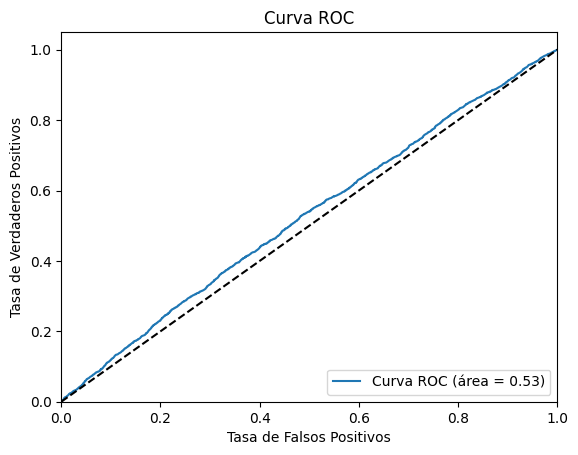

In [384]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Curva ROC (área = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()